In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import confusion_matrix


In [ ]:
data = pd.read_csv('NB_Dataset.txt', sep="\t", header=None)
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'class']
X = data.iloc[:, data.columns != 'class'].values
y = data.iloc[:, -1].values
data.head(5)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
data.drop(columns=['Sex'])

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2


Guassian


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=100, random_state=2)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_val) 
print("the accuracy is : " + str(round(accuracy_score(y_pred, y_val) * 100, 2)))
c_matrix = confusion_matrix(y_val, y_pred)
print("the confusion matrix  is :  \n "  + str(c_matrix))

the accuracy is : 59.23
the confusion matrix  is :  
 [[ 734   81    3]
 [ 529 1337  453]
 [  71  525  344]]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=1000, random_state=2)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_val)
print("the accuracy is : " + str(round(accuracy_score(y_pred, y_val) * 100, 2)))
c_matrix = confusion_matrix(y_val, y_pred)
print("the confusion matrix  is :  \n "  + str(c_matrix))

the accuracy is : 58.58
the confusion matrix  is :  
 [[580  68   3]
 [370 945 480]
 [ 47 348 336]]


Kernel


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=100, random_state=2)
bandwidth = np.arange( 0.05, 2, 20)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(X_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([0.05])}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

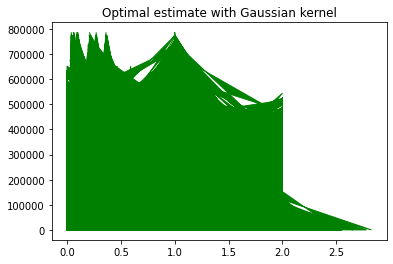

optimal bandwidth: 0.05
accuracy = 199.814455174179


In [ ]:
kde = grid.best_estimator_
log_dens = kde.score_samples(X_val)
plt.fill(X_val, np.exp(log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))
print('accuracy =', grid.best_score_)

In [ ]:
xs = np.linspace(-0.06, 0.06, 1000)
log_probs = kde.score_samples(X_val)
kde_pdf = np.exp(log_probs)
print(kde_pdf)

[3.17625902 7.17960111 1.16292679 ... 3.86910446 7.96552448 0.93736665]


Naive Est


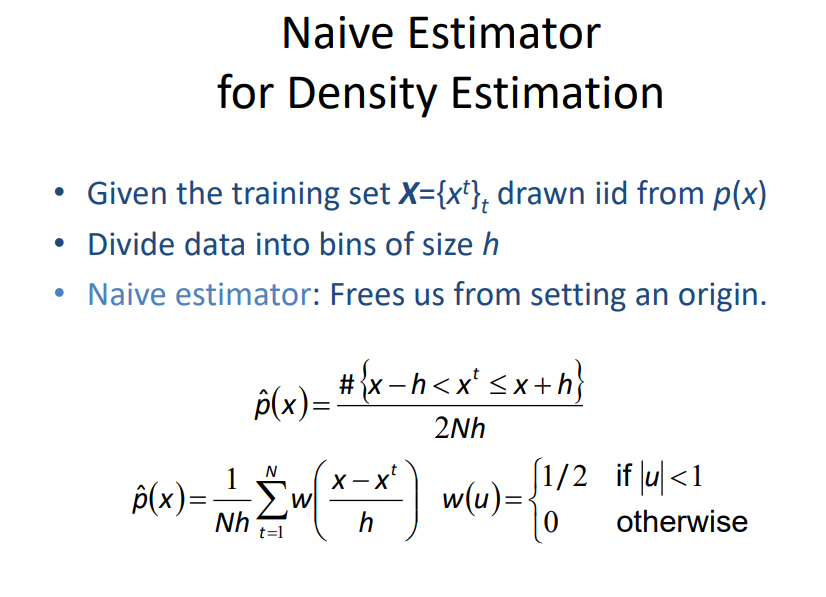

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=100, random_state=2)
X=data['Diameter']

In [ ]:
def calc_prior(self, features, target):
    self.prior = (features.groupby(target).apply(lambda x: len(x))/self.rows).to_numpy()
    return self.prior

In [ ]:
def calculate_probability_density(data_array,x,bandwidth=0.1):

    def weight_est(x) :
        for row in x:
            if abs(row) >= 1 :
                return 1/2
            else : 
                return 0

    N=len(data_array)
    res=0

    if N==0:
        return 0

    for i in range(len(data_array)):

        res += weight_est((x-data_array[i])/bandwidth)

    res /= (N*bandwidth)

    return res  

In [ ]:
calculate_probability_density(X, X , 0.25)

0.010533875987550874

In [ ]:
# posterior probabilities
def calc_posterior(self, x):
    posteriors = []
    for i in range(self.count):
        prior = np.log(self.prior[i]) 
        conditional = np.sum(np.log(self.calculate_probability_density(i, x, bandwith)))
        posterior = prior + conditional
        posteriors.append(posterior)
    return self.classes[np.argmax(posteriors)]

In [ ]:
def fit(self, features, target):
    # define class variables 
    self.classes = np.unique(target)
    self.count = len(self.classes)
    self.feature_nums = features.shape[1]
    self.rows = features.shape[0]
    
    # calculate statistics    
    self.calc_statistics(features, target)
    self.calc_prior(features, target)
        
def predict(self, features):
    preds = [self.calc_posterior(f) for f in features.to_numpy()]
    return preds